In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
odom_pos = pd.read_json('../tmp_datas/odom_pos.json')
real_pos = pd.read_json('../tmp_datas/real_pos.json')

In [3]:
print(odom_pos.shape)
print(real_pos.shape)

(8182, 3)
(68279, 3)


In [4]:
odom_pos.head()

,time,x,y
0,214375000000,3.262653,4.793273
1,214375000000,3.262653,4.793273
2,214386000000,3.262653,4.793273
3,214389000000,3.262653,4.793273
4,214406000000,3.262653,4.793273


In [5]:
odom_pos.tail()

,time,x,y
8177,282526000000,2.794345,0.00146
8178,282539000000,2.794345,0.00146
8179,282546000000,2.794345,0.00146
8180,282553000000,2.794345,0.00146
8181,282553000000,2.794345,0.00146


In [6]:
real_pos.head()

,time,x,y
0,214282000000,1.830112,-2.545430
1,214282000000,1.830112,-2.545431
2,214282000000,1.830112,-2.545430
3,214282000000,1.830112,-2.545430
4,214282000000,1.830112,-2.545431


In [7]:
real_pos.tail()

,time,x,y
68274,282551000000,2.191478,2.234205
68275,282551000000,2.191478,2.234205
68276,282552000000,2.191478,2.234205
68277,282554000000,2.191478,2.234205
68278,282555000000,2.191478,2.234205


In [8]:
threshold = 3000000

tmp_list = []
for idx, row in odom_pos.iterrows():
    min_t = row['time'] - threshold
    max_t = row['time'] + threshold
#     print(real_pos[])
    df = real_pos[(real_pos['time']>min_t) & (real_pos['time']<max_t)].copy()
    real_xy = df[["x", "y"]].mean()
    tmp_list.append({
        "time": row['time'],
        "odom_x": row['x'],
        "odom_y": row['y'],
        "real_x": 5 - real_xy.x,
        "real_y": 2.3 - real_xy.y,
    })
df_odom_And_real = pd.DataFrame(tmp_list)
df_odom_And_real

,odom_x,odom_y,real_x,real_y,time
0,3.262653,4.793273,3.169886,4.845431,2.143750e+11
1,3.262653,4.793273,3.169886,4.845431,2.143750e+11
2,3.262653,4.793273,3.169886,4.845431,2.143860e+11
3,3.262653,4.793273,3.169886,4.845431,2.143890e+11
4,3.262653,4.793273,3.169885,4.845431,2.144060e+11
5,3.262653,4.793273,3.169885,4.845431,2.144190e+11
6,3.262653,4.793273,3.169885,4.845431,2.144190e+11
7,3.262653,4.793273,3.169885,4.845431,2.144260e+11
8,3.262653,4.793273,3.169884,4.845431,2.144400e+11
9,3.262653,4.793273,3.169884,4.845432,2.144460e+11


In [9]:
df_odom_And_real = df_odom_And_real[df_odom_And_real['odom_x']>0.1].copy()
df_odom_And_real

,odom_x,odom_y,real_x,real_y,time
0,3.262653,4.793273,3.169886,4.845431,2.143750e+11
1,3.262653,4.793273,3.169886,4.845431,2.143750e+11
2,3.262653,4.793273,3.169886,4.845431,2.143860e+11
3,3.262653,4.793273,3.169886,4.845431,2.143890e+11
4,3.262653,4.793273,3.169885,4.845431,2.144060e+11
5,3.262653,4.793273,3.169885,4.845431,2.144190e+11
6,3.262653,4.793273,3.169885,4.845431,2.144190e+11
7,3.262653,4.793273,3.169885,4.845431,2.144260e+11
8,3.262653,4.793273,3.169884,4.845431,2.144400e+11
9,3.262653,4.793273,3.169884,4.845432,2.144460e+11


In [10]:
x_mean_delta = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs().mean()
y_mean_delta = (df_odom_And_real['odom_y']-df_odom_And_real['real_y']).abs().mean()

error = math.sqrt(x_mean_delta**2 + y_mean_delta**2)
print(error)

0.06953393926929757


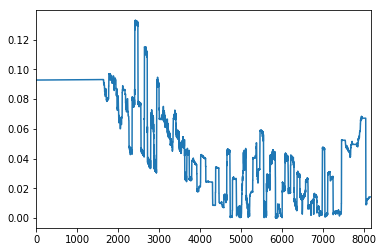

In [11]:
df = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs()
df.plot()